In [18]:
import time
from timeit import default_timer as timer
import numpy as np 
from functools import wraps
import cProfile
import subprocess
NAME = "Phoebe Schwartz"

# Task 1.1
Clock granularity is the smallest measurable time difference that the system’s timer can distinguish. It depends on the underlying hardware and the precision of the software timer being used. Granularity impacts the accuracy of performance measurements and time-sensitive operations in applications.
## Comparison of timers: 
time.time() and time.time_ns() have comparable granularities (approximately $5.17e-5$), suggesting they rely on the same underlying system clock. timeit, designed for high-precision benchmarking, shows a finer granularity of around $1.99e-7$, indicating that it may use a more precise timer. We conclude that if we use time.time() or time.time_ns() for profiling, operations may not be reliably measured. Only for general-purpose timekeeping or measuring events that span milliseconds or more, time.time() or time.time_ns() are adequate. 

In [2]:
def checktick_0():
    """
    time.time(): precision is approximately ± 1 microsecond
    """
    M = 200
    timesfound = np.empty((M,))
    for i in range(M):
        t1 =  time.time() # get timestamp from timer
        t2 = time.time() # get timestamp from timer
        while (t2 - t1) < 1e-16: # if zero then we are below clock granularity, retake timing
            t2 = time.time() # get timestamp from timer
        t1 = t2 # this is outside the loop
        timesfound[i] = t1 # record the time stamp
    minDelta = 1000000
    Delta = np.diff(timesfound) # it should be cast to int only when needed
    minDelta = Delta.min()
    return minDelta

def checktick_1():
    """
    timeit: higher resolution, lower clock granularity
    """
    M = 200
    timesfound = np.empty((M,))
    for i in range(M):
        t1 =  timer() # get timestamp from timer
        t2 = timer() # get timestamp from timer
        while (t2 - t1) < 1e-16: # if zero then we are below clock granularity, retake timing
            t2 = timer() # get timestamp from timer
        t1 = t2 # this is outside the loop
        timesfound[i] = t1 # record the time stamp
    minDelta = 1000000
    Delta = np.diff(timesfound) # it should be cast to int only when needed
    minDelta = Delta.min()
    return minDelta

def checktick_2():
    """
    higher resolution in nanoseconds
    """
    M = 200
    timesfound = np.empty((M,))
    for i in range(M):
        t1 =  time.time_ns() # get timestamp from timer
        t2 = time.time_ns() # get timestamp from timer
        while (t2 - t1) < 1e-16: # if zero then we are below clock granularity, retake timing
            t2 = time.time_ns() # get timestamp from timer
        t1 = t2 # this is outside the loop
        timesfound[i] = t1 # record the time stamp
    minDelta = 1000000
    Delta = np.diff(timesfound) # it should be cast to int only when needed
    minDelta = Delta.min()
    return minDelta

In [12]:

print("----------Exercise 1: Profiling the Julia Set Code----------\n")
print("-------------------------Task 1.1-------------------------")
print("time.time() : ", checktick_0())
print("timeit : ", checktick_1())
print("time.time_ns() : ", checktick_2()/1000000000, "\n") # convert to seconds

----------Exercise 1: Profiling the Julia Set Code----------

-------------------------Task 1.1-------------------------
time.time() :  5.173683166503906e-05
timeit :  1.9997241906821728e-07
time.time_ns() :  5.1712e-05 



# Task 1.2 
The standard deviation for calc_pure_python was $0.088$. The standard deviation for calculate_z_serial_python was $0.026$. These are both relatively low standard deviations which indicate that the execution times are mostly consistent across runs. 

The smallest measurable time difference for our system was approximately $125 \, \text{ns}$. The standard deviations are orders of magnitude larger than the clock granularity. This means that the variations in execution time are due to external system factors (e.g., CPU scheduling, background processes), not limitations of the timer resolution.

not sure i understand this part...

In [4]:
def timefn_1_2(fn):
  @wraps(fn)
  def measure_time(*args, **kwargs):
    times = np.zeros(3, dtype=float)
    for i in range(3):
      t1 = timer()
      result = fn(*args, **kwargs)
      t2 = timer()
      times[i] = t2-t1
    print(f"@timefn_1_2: {fn.__name__} took {np.average(times)} seconds on average, with standard deviation {np.std(times)}")
    return result
  return measure_time

In [16]:
from main import calc_pure_python, calculate_z_serial_purepython

print("-------------------------Task 1.2-------------------------")
print("Profiling calc_pure_python:")
test1 = timefn_1_2(calc_pure_python)
params2 = test1(desired_width=1000, max_iterations=300)
print("\n Profiling calculate_z_serial_purepython")
test2 = timefn_1_2(calculate_z_serial_purepython)
test2(300, params2[0], params2[1])
print("\n")
params_zfunc = params2


-------------------------Task 1.2-------------------------
Profiling calc_pure_python:
Length of x: 1000
Total elements: 1000000
calculate_z_serial_purepython took 7.0796380043029785 seconds
Length of x: 1000
Total elements: 1000000
calculate_z_serial_purepython took 6.95916748046875 seconds
Length of x: 1000
Total elements: 1000000
calculate_z_serial_purepython took 7.121560573577881 seconds
@timefn_1_2: calc_pure_python took 7.384533599998879 seconds on average, with standard deviation 0.07084709015137068

 Profiling calculate_z_serial_purepython
@timefn_1_2: calculate_z_serial_purepython took 6.959447966665418 seconds on average, with standard deviation 0.12241839569279474




# Task 1.3 
Results of cProfile:  


In [26]:
! python -m cProfile -s cumulative JuliaSet.py

# remove @profile decorator from the code

Length of x: 100
Total elements: 10000
calculate_z_serial_purepython took 0.13451790809631348 seconds
new sum:  334236
         364453 function calls in 0.145 seconds

   Ordered by: cumulative time

   ncalls  tottime  percall  cumtime  percall filename:lineno(function)
        1    0.000    0.000    0.145    0.145 {built-in method builtins.exec}
        1    0.000    0.000    0.145    0.145 JuliaSet.py:1(<module>)
        1    0.007    0.007    0.145    0.145 JuliaSet.py:20(calc_pure_python)
        1    0.085    0.085    0.134    0.134 JuliaSet.py:61(calculate_z_serial_purepython)
   344236    0.049    0.000    0.049    0.000 {built-in method builtins.abs}
    20200    0.003    0.000    0.003    0.000 {method 'append' of 'list' objects}
        4    0.000    0.000    0.000    0.000 {built-in method builtins.print}
        2    0.000    0.000    0.000    0.000 {built-in method builtins.sum}
        1    0.000    0.000    0.000    0.000 {method 'disable' of '_lsprof.Profiler' objects}

In [27]:
! python -m cProfile -o profile.stats JuliaSet.py

Length of x: 100
Total elements: 10000
calculate_z_serial_purepython took 0.15110087394714355 seconds
new sum:  334236


In [36]:
! python -m snakeviz profile.stats --server

# how long did it take you to run this code? 

^C


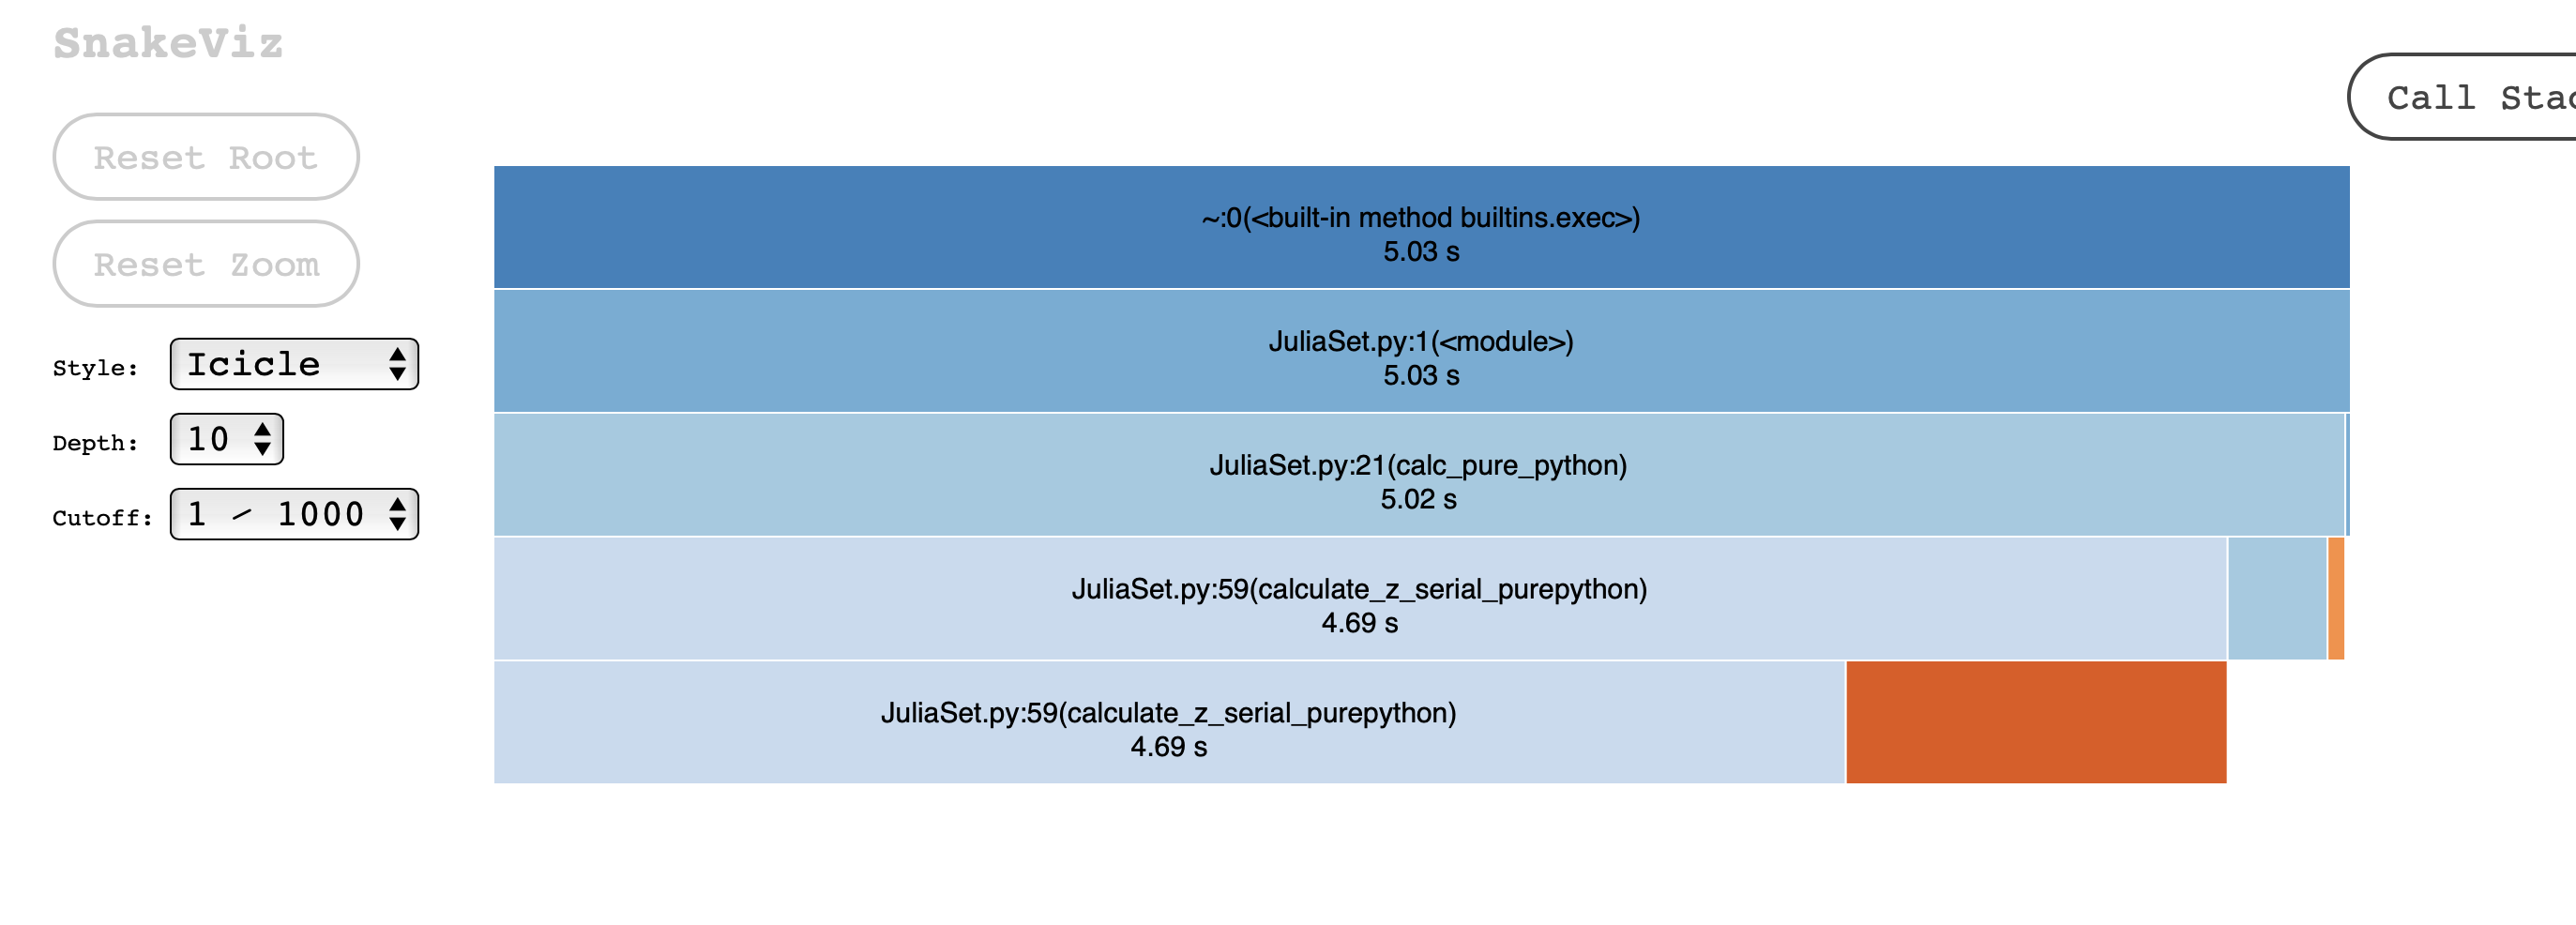

Result of line_profiler:

In [23]:
## add @profile in the line above def calculate_z_serial_purepython(maxiter, zs, cs):
! python -m kernprof -l JuliaSet.py

Length of x: 100
Total elements: 10000
calculate_z_serial_purepython took 0.8826115131378174 seconds
new sum:  334236
Wrote profile results to JuliaSet.py.lprof
Inspect results with:
C:\Users\phoeb\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\python.exe -m line_profiler -rmt "JuliaSet.py.lprof"


Calculate_z_serial_purepython took $0.88$ seconds with line_profiler compared to the shorter $0.34$ seconds with cProfile. 

In [28]:
! python -m line_profiler -rmt "JuliaSet.py.lprof"


Timer unit: 1e-06 s

Total time: 0.530917 s
File: JuliaSet.py
Function: calculate_z_serial_purepython at line 60

Line #      Hits         Time  Per Hit   % Time  Line Contents
    60                                           # @profile
    61                                           def calculate_z_serial_purepython(maxiter, zs, cs):
    62                                               """Calculate output list using Julia update rule"""
    63         1          6.2      6.2      0.0      output = [0] * len(zs)
    64     10001       4713.6      0.5      0.9      for i in range(len(zs)):
    65     10000       3918.7      0.4      0.7          n = 0
    66     10000       4616.9      0.5      0.9          z = zs[i]
    67     10000       4543.7      0.5      0.9          c = cs[i]
    68    344236     219936.4      0.6     41.4          while abs(z) < 2 and n < maxiter:
    69    334236     154449.2      0.5     29.1              z = z * z + c
    70    334236     134315.2      0.4  

Measure the overhead added by using cProfile and line_profiler: 
Overhead using cProfile: 4.705276966094971 s - 3.439000129699707 s = 1.2662768364 s
Overhead using line_profiler: 27.055697202682495 s - 3.439000129699707 s = 23.616697073 s



# Task 1.4 Memory-profile the Juliaset code
Report the memory profiling results from memory_profiler and mprof (including the plot)
Measure the overhead of memory_profiler and mprof.
We reduce the problem size to a 100 x 100 grid

In [ ]:
# add the @profile to calculate_z_serial_purepython()
# remove the profile time labels
! python -m memory_profiler JuliaSet.py

Length of x: 100
Total elements: 10000
calculate_z_serial_purepython took 22.14052963256836 seconds
new sum:  334236
Filename: JuliaSet.py

Line #    Mem usage    Increment  Occurrences   Line Contents
    60   53.816 MiB   53.816 MiB           1   @profile
    61                                         def calculate_z_serial_purepython(maxiter, zs, cs):
    62                                             """Calculate output list using Julia update rule"""
    63   53.895 MiB    0.078 MiB           1       output = [0] * len(zs)
    64   53.906 MiB -852.309 MiB       10001       for i in range(len(zs)):
    65   53.906 MiB -852.191 MiB       10000           n = 0
    66   53.906 MiB -852.191 MiB       10000           z = zs[i]
    67   53.906 MiB -852.191 MiB       10000           c = cs[i]
    68   53.906 MiB -42401.727 MiB      344236           while abs(z) < 2 and n < maxiter:
    69   53.906 MiB -41549.426 MiB      334236               z = z * z + c
    70   53.906 MiB -41549.551 Mi

In [40]:
! python -m mprof run JuliaSet.py

mprof.py: Sampling memory every 0.1s
running new process
running as a Python program...
Length of x: 100
Total elements: 10000
calculate_z_serial_purepython took 1.081538438796997 seconds
new sum:  334236


In [ ]:
! python -m mprof plot mprofile_20250121113250.dat
# add in time labels

Figure(1260x540)


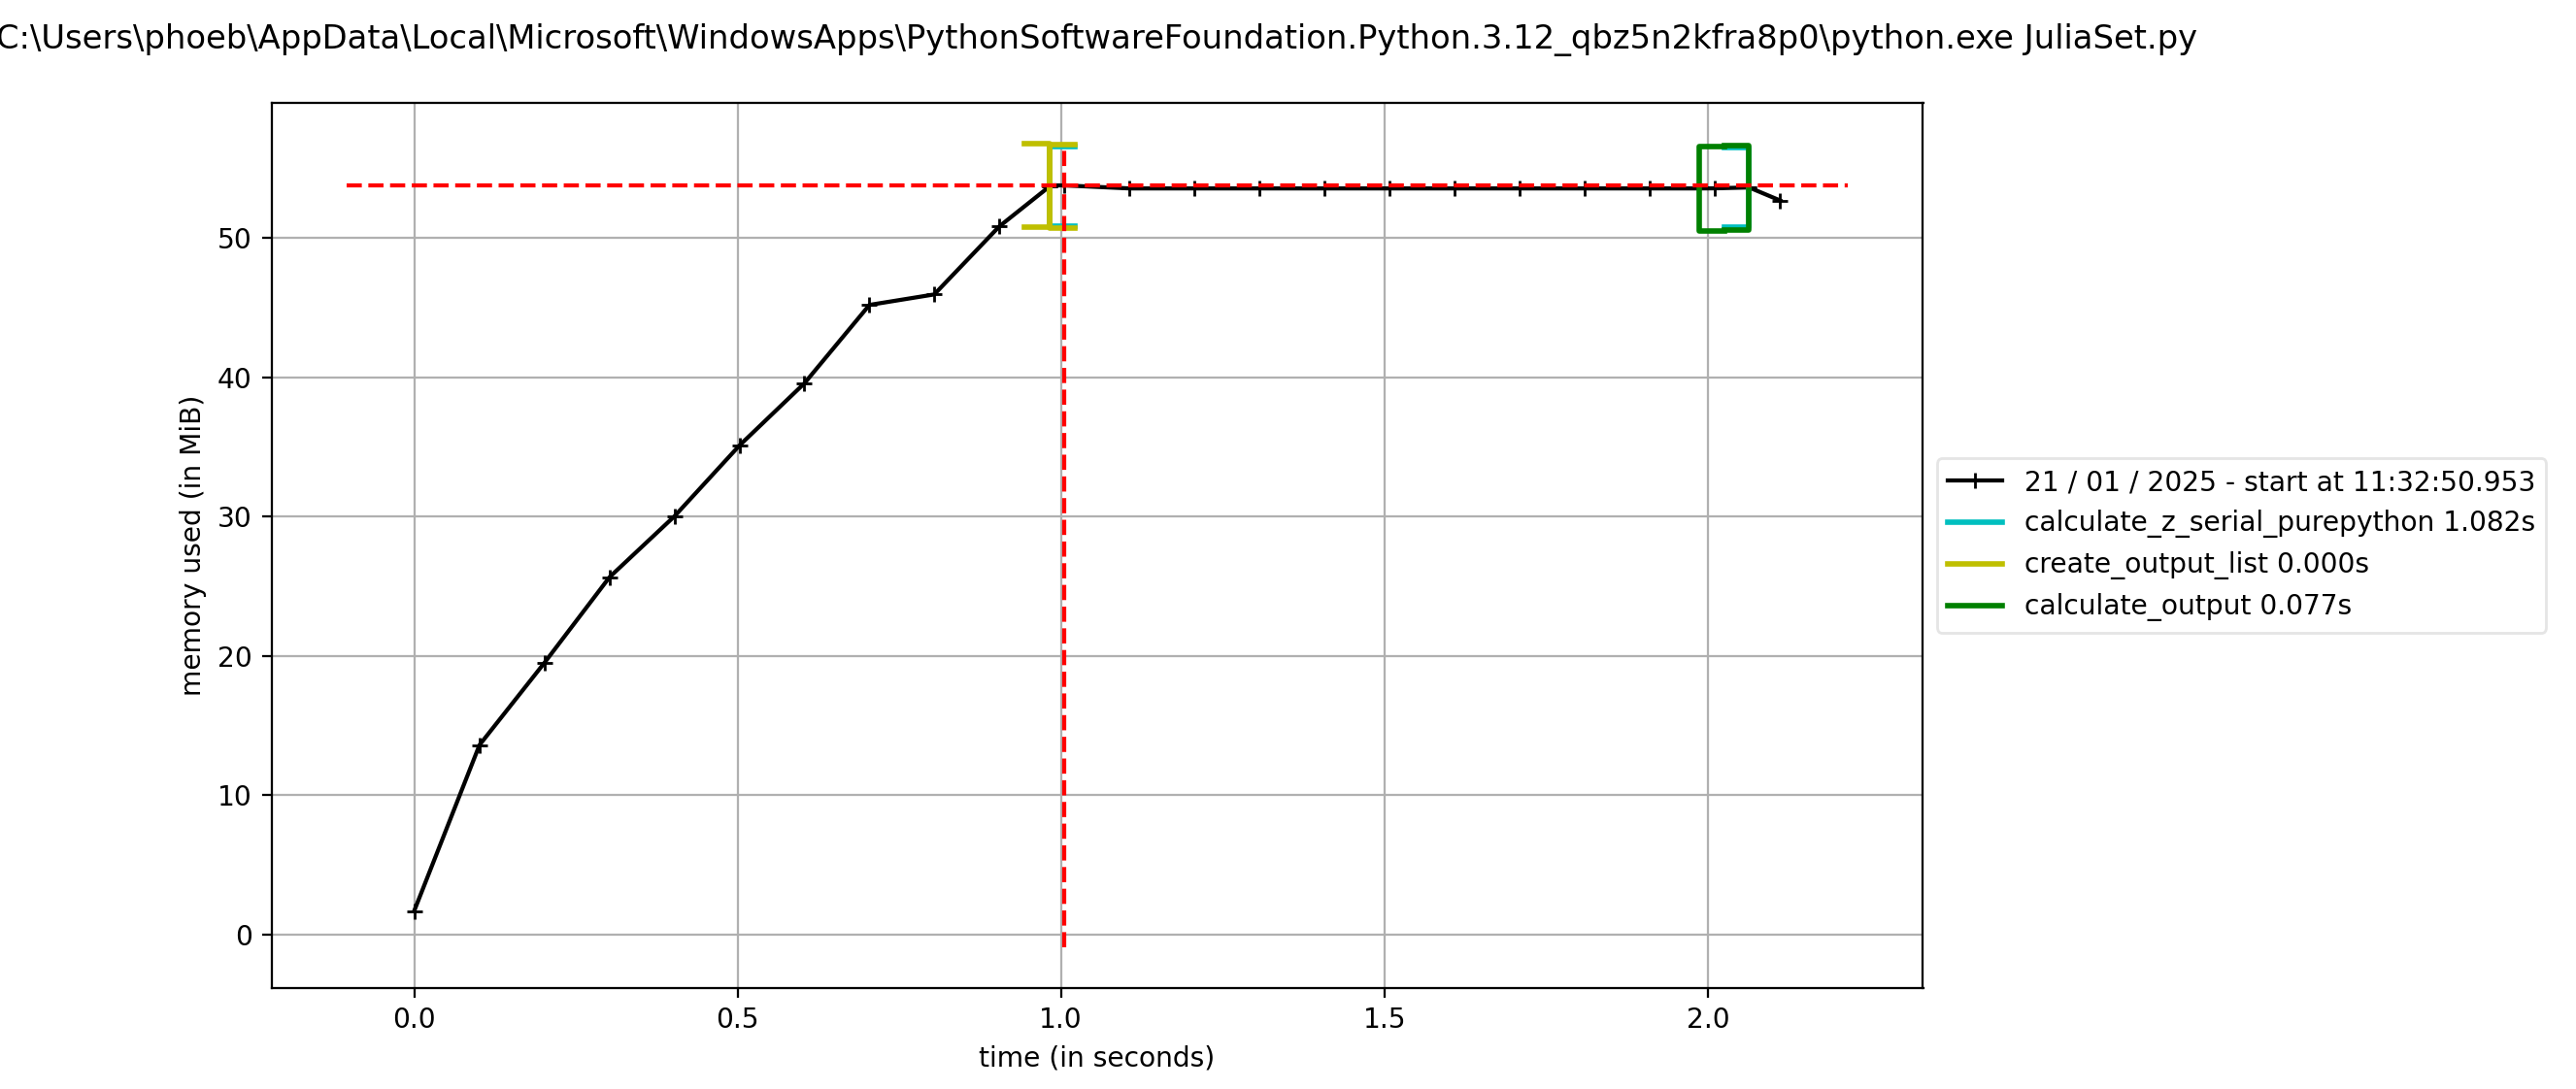

Overhead added through memory_profiler: 13.593201875686646s - 0.044191837310791016s = 13.5490100384 s -> extensive overhead added 
Overhead added through mproof: 0.033857107162475586s - 0.04529619216918945s = -0.01143908501s -> no overhead added

# Exercise 2 
1. cProfile & line_profiler

In [44]:
! python -m cProfile -s cumulative DiffusionProcess.py

# remove @profile decorator from the code

         9 function calls in 0.931 seconds

   Ordered by: cumulative time

   ncalls  tottime  percall  cumtime  percall filename:lineno(function)
        1    0.000    0.000    0.931    0.931 {built-in method builtins.exec}
        1    0.004    0.004    0.931    0.931 DiffusionProcess.py:1(<module>)
        1    0.021    0.021    0.927    0.927 DiffusionProcess.py:19(run_experiment)
        5    0.906    0.181    0.906    0.181 DiffusionProcess.py:4(evolve)
        1    0.000    0.000    0.000    0.000 {method 'disable' of '_lsprof.Profiler' objects}




In [45]:
! python -m cProfile -o profile_DiffusionProcess.stats DiffusionProcess.py

2. SnakeViz to visualize the profiling information from cProfile

In [5]:

! python -m snakeviz profile_DiffusionProcess.stats --server

snakeviz web server started on 127.0.0.1:8080; enter Ctrl-C to exit
http://127.0.0.1:8080/snakeviz/%2FUsers%2Fcarlottaholzle%2FDesktop%2FProfilling_Code%2Fprofile_DiffusionProcess.stats
^C

Bye!


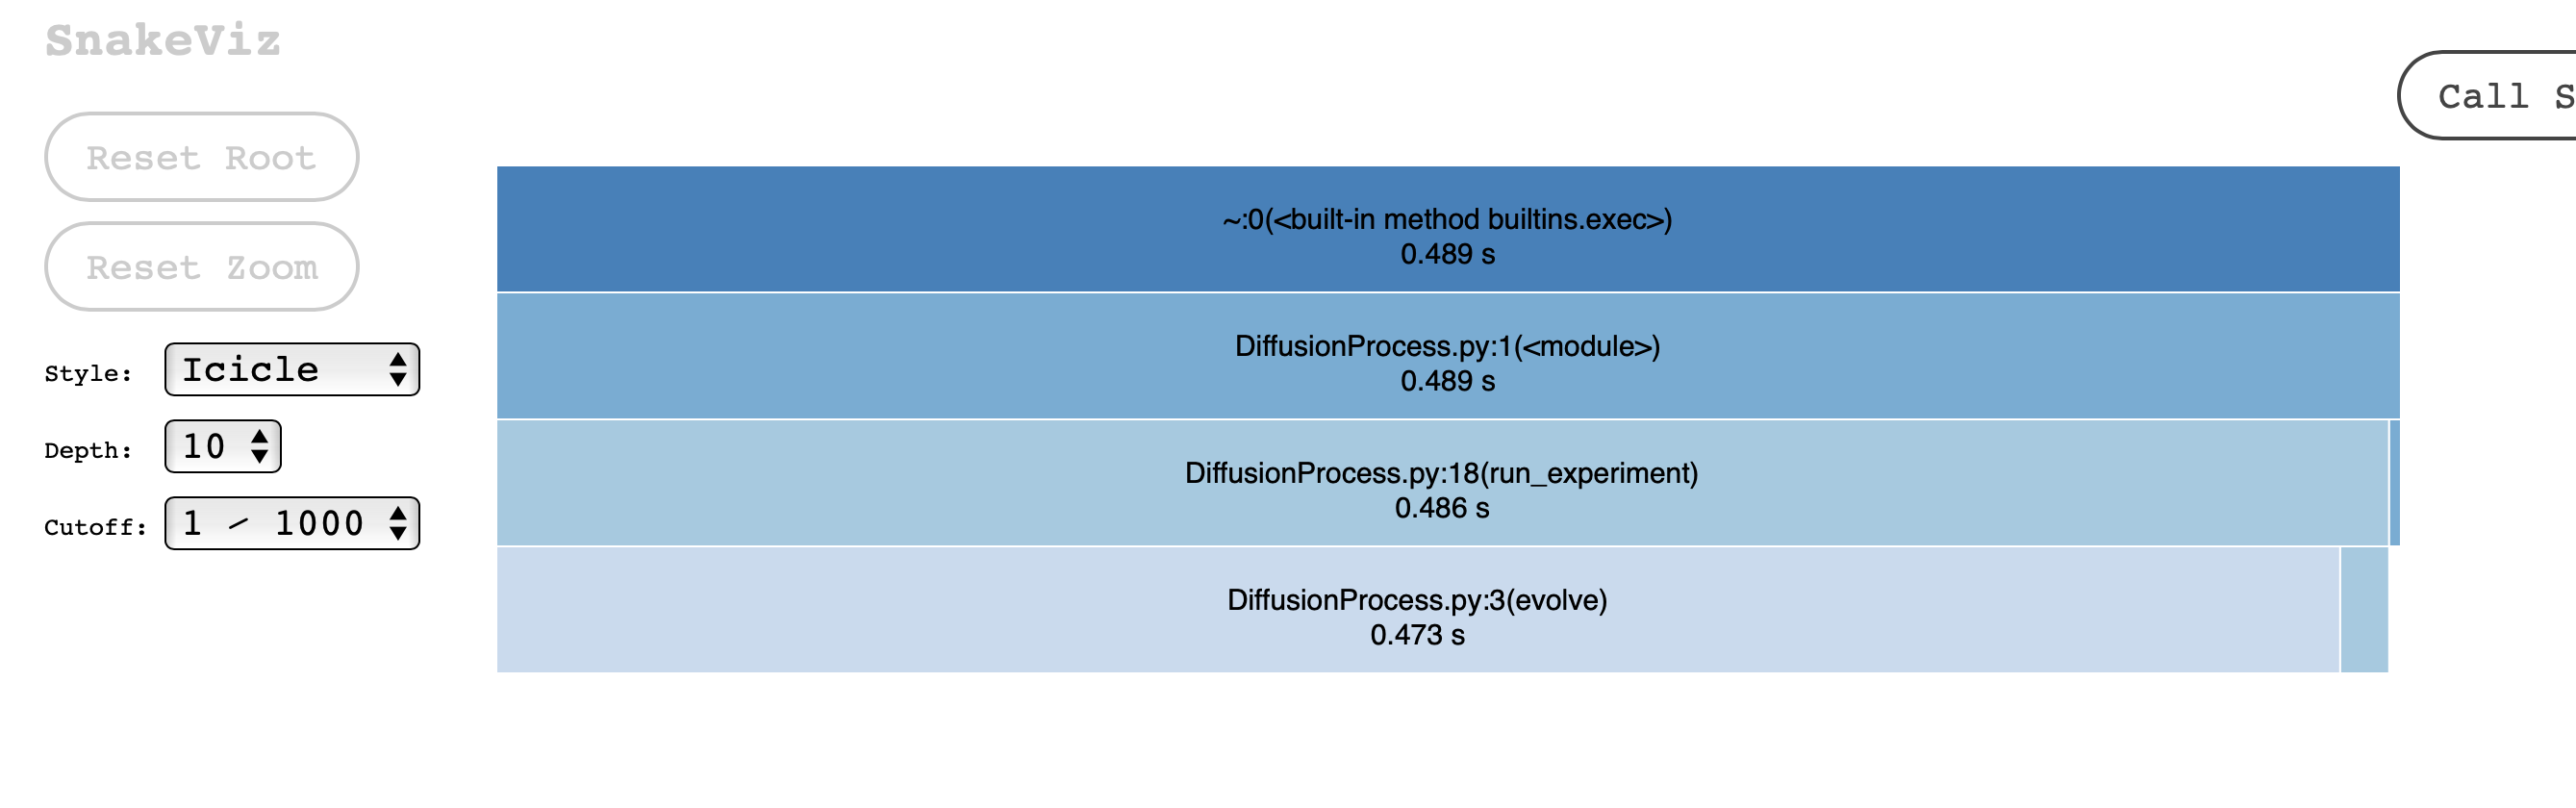

3. Result of line_profiler:

In [46]:
# add @profile to evolve method
! python -m kernprof -l DiffusionProcess.py

Wrote profile results to DiffusionProcess.py.lprof
Inspect results with:
C:\Users\phoeb\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\python.exe -m line_profiler -rmt "DiffusionProcess.py.lprof"


In [47]:
! python -m line_profiler -rmt "DiffusionProcess.py.lprof"

Timer unit: 1e-06 s

Total time: 6.01045 s
File: DiffusionProcess.py
Function: evolve at line 3

Line #      Hits         Time  Per Hit   % Time  Line Contents
     3                                           @profile
     4                                           def evolve(grid, dt, D=1.0):
     5         5          9.3      1.9      0.0      xmax, ymax = grid_shape
     6      3205      13288.5      4.1      0.2      new_grid = [[0.0] * ymax for x in range(xmax)]
     7      3205       1900.9      0.6      0.0      for i in range(xmax):
     8   2051200     929113.9      0.5     15.5          for j in range(ymax):
     9   2048000     808407.9      0.4     13.5              grid_xx = (
    10   2048000    1256252.1      0.6     20.9                  grid[(i + 1) % xmax][j] + grid[(i - 1) % xmax][j] - 2.0 * grid[i][j]
    11                                                       )
    12   2048000     801141.5      0.4     13.3              grid_yy = (
    13   2048000    1229229.9 

# Task 2.2 Memory-profile the diffusion code.

In [48]:
# add @profile to evolve method & make the grid_shape smaller -> (320,320) instead of (640, 640)
! python -m memory_profiler DiffusionProcess.py

Filename: DiffusionProcess.py

Line #    Mem usage    Increment  Occurrences   Line Contents
     3   60.938 MiB   51.496 MiB           5   @profile
     4                                         def evolve(grid, dt, D=1.0):
     5   60.938 MiB   -0.102 MiB           5       xmax, ymax = grid_shape
     6   60.938 MiB   -2.418 MiB        1605       new_grid = [[0.0] * ymax for x in range(xmax)]
     7   61.715 MiB -208.926 MiB        1605       for i in range(xmax):
     8   61.715 MiB -67365.719 MiB      513600           for j in range(ymax):
     9   61.715 MiB -67147.840 MiB      512000               grid_xx = (
    10   61.715 MiB -67156.789 MiB      512000                   grid[(i + 1) % xmax][j] + grid[(i - 1) % xmax][j] - 2.0 * grid[i][j]
    11                                                     )
    12   61.715 MiB -67154.965 MiB      512000               grid_yy = (
    13   61.715 MiB -67154.945 MiB      512000                   grid[i][(j + 1) % ymax] + grid[i][(j - 1) % 

In [49]:
! python -m mprof run DiffusionProcess.py 

mprof.py: Sampling memory every 0.1s
running new process
running as a Python program...


In [50]:
! python -m mprof plot mprofile_20250121121723.dat

Figure(1260x540)


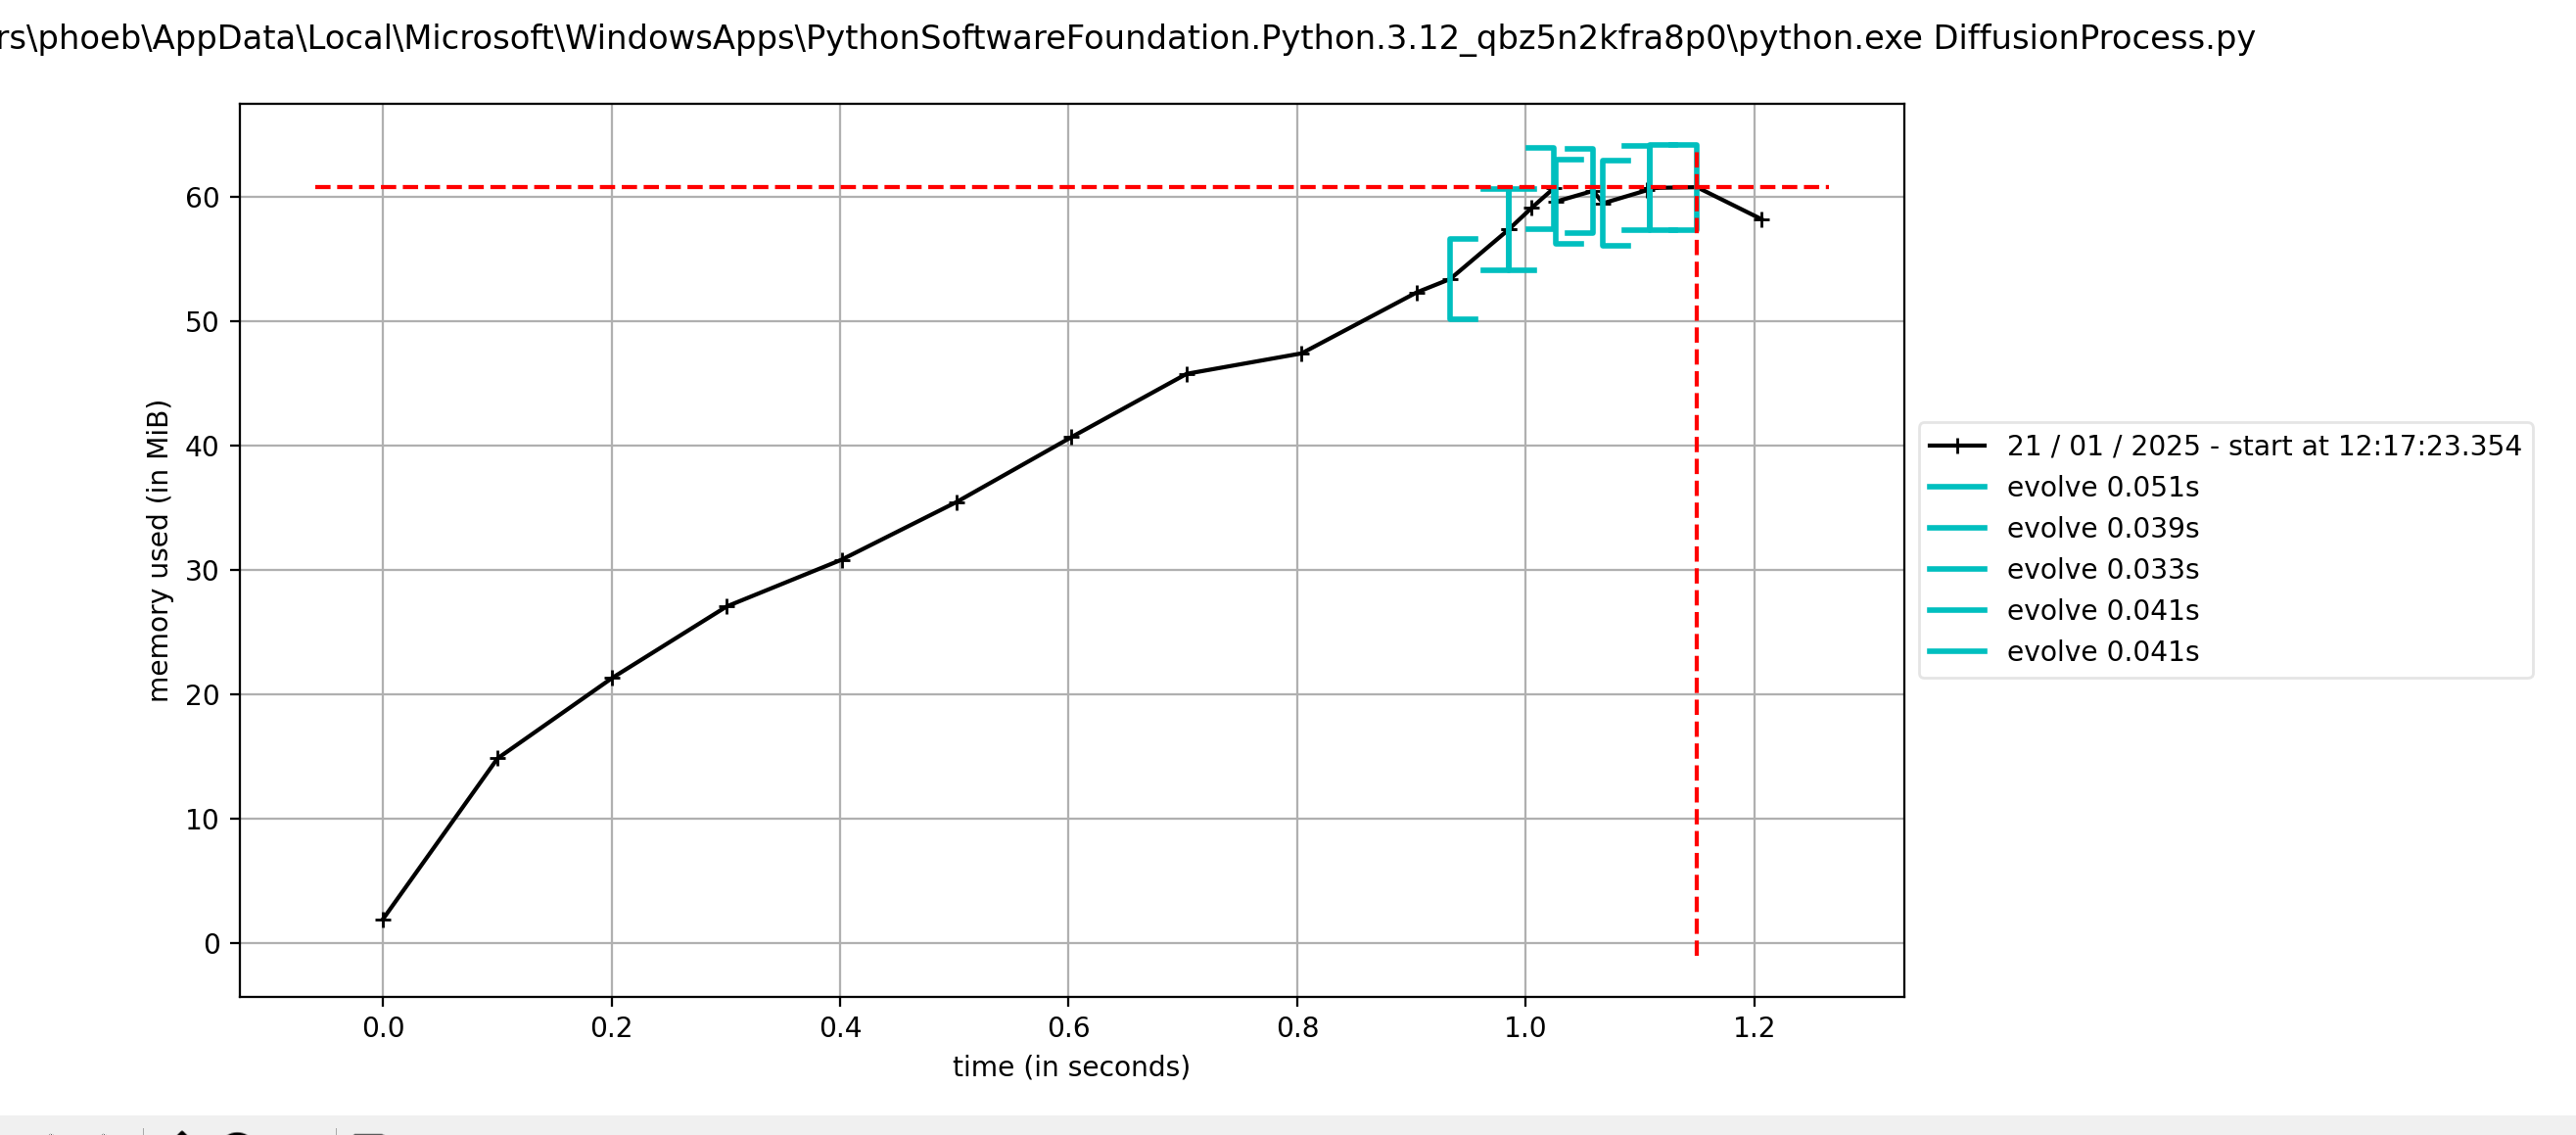

# Bonus task 
CPU usage percentage per core

final plot and summary table

Describe the design and implementation of the profiler and report the results of your profiler against the codes used in Exercise I and II. 



In [66]:
# CPU usage percentage per core: use the psutil.cpu_percent(interval=1, percpu=True) function.
# plot with the evolution of the CPU percentage for different cores and a table with recorded value


In [67]:
import psutil
import time
import matplotlib.pyplot as plt
import pandas as pd
from functools import wraps

# Tool for recording CPU usage
class CPUProfiler:
    def __init__(self):
        self.data = []
        self.start_time = None

    def start(self):
        self.start_time = time.time()

    def record(self):
        if self.start_time is None:
            raise RuntimeError("Profiler has not been started.")
        elapsed_time = time.time() - self.start_time
        cpu_usage = psutil.cpu_percent(interval=1, percpu=True)
        self.data.append((elapsed_time, cpu_usage))

    def save_data(self, filename="cpu_usage.csv"):
        df = pd.DataFrame(self.data, columns=["Time (s)", "CPU Usage"])
        df.to_csv(filename, index=False)

    def plot(self):
        # Create a DataFrame for visualization
        times = [entry[0] for entry in self.data]
        usage = [entry[1] for entry in self.data]

        usage_transposed = list(zip(*usage))
        for core_idx, core_usage in enumerate(usage_transposed):
            plt.plot(times, core_usage, label=f"Core {core_idx}")
        
        plt.xlabel("Time (s)")
        plt.ylabel("CPU Usage (%)")
        plt.title("CPU Usage Per Core")
        plt.legend()
        plt.grid(True)
        plt.show()

    def summary_table(self):
        usage = [entry[1] for entry in self.data]
        avg_usage = [sum(core) / len(usage) for core in zip(*usage)]
        summary = pd.DataFrame({
            "Core": [f"Core {i}" for i in range(len(avg_usage))],
            "Average CPU Usage (%)": avg_usage
        })
        return summary

# Decorator to profile a function
def profile(func):
    @wraps(func)
    def wrapper(*args, **kwargs):
        profiler.record()  # Record before function call
        result = func(*args, **kwargs)
        profiler.record()  # Record after function call
        return result
    return wrapper

# Initialize profiler
profiler = CPUProfiler()


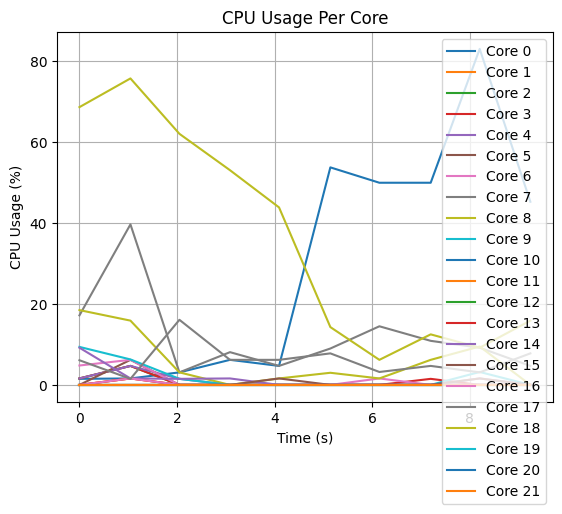

       Core  Average CPU Usage (%)
0    Core 0                  29.93
1    Core 1                   0.00
2    Core 2                   0.63
3    Core 3                   0.78
4    Core 4                   0.78
5    Core 5                   0.62
6    Core 6                   1.26
7    Core 7                  12.11
8    Core 8                   5.94
9    Core 9                   2.04
10  Core 10                   0.00
11  Core 11                   0.16
12  Core 12                   0.00
13  Core 13                   0.16
14  Core 14                   1.55
15  Core 15                   0.32
16  Core 16                   0.16
17  Core 17                   6.27
18  Core 18                  36.17
19  Core 19                   0.00
20  Core 20                   0.00
21  Core 21                   0.00


In [68]:

# Function implementations from the DiffusionProcess.py file
grid_shape = (320, 320)

@profile
def evolve(grid, dt, D=1.0):
    xmax, ymax = grid_shape
    new_grid = [[0.0] * ymax for x in range(xmax)]
    for i in range(xmax):
        for j in range(ymax):
            grid_xx = (
                grid[(i + 1) % xmax][j] + grid[(i - 1) % xmax][j] - 2.0 * grid[i][j]
            )
            grid_yy = (
                grid[i][(j + 1) % ymax] + grid[i][(j - 1) % ymax] - 2.0 * grid[i][j]
            )
            new_grid[i][j] = grid[i][j] + D * (grid_xx + grid_yy) * dt
    return new_grid

def run_experiment(num_iterations):
    # Setting up initial conditions 
    xmax, ymax = grid_shape
    grid = [[0.0] * ymax for x in range(xmax)]

    # Simulating a drop of dye in the middle of our simulated region
    block_low = int(grid_shape[0] * 0.4)
    block_high = int(grid_shape[0] * 0.5)
    for i in range(block_low, block_high):
        for j in range(block_low, block_high):
            grid[i][j] = 0.005

    # Evolve the initial conditions
    for i in range(num_iterations):
        grid = evolve(grid, 0.1)


profiler.start()
run_experiment(5)
profiler.plot()
summary = profiler.summary_table()
print(summary)
profiler.save_data()


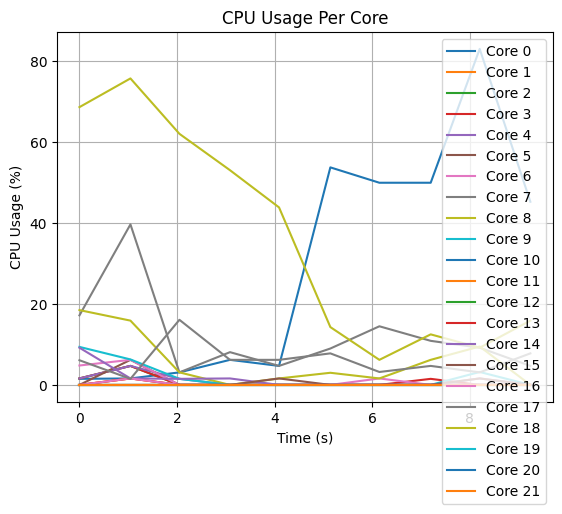

       Core  Average CPU Usage (%)
0    Core 0                  29.93
1    Core 1                   0.00
2    Core 2                   0.63
3    Core 3                   0.78
4    Core 4                   0.78
5    Core 5                   0.62
6    Core 6                   1.26
7    Core 7                  12.11
8    Core 8                   5.94
9    Core 9                   2.04
10  Core 10                   0.00
11  Core 11                   0.16
12  Core 12                   0.00
13  Core 13                   0.16
14  Core 14                   1.55
15  Core 15                   0.32
16  Core 16                   0.16
17  Core 17                   6.27
18  Core 18                  36.17
19  Core 19                   0.00
20  Core 20                   0.00
21  Core 21                   0.00


In [69]:
# area of complex space to investigate
x1, x2, y1, y2 = -1.8, 1.8, -1.8, 1.8
c_real, c_imag = -0.62772, -.42193

@profile
def calculate_z_serial_purepython(maxiter, zs, cs):
    """Calculate output list using Julia update rule"""
    output = [0] * len(zs)
    for i in range(len(zs)):
        n = 0
        z = zs[i]
        c = cs[i]
        while abs(z) < 2 and n < maxiter:
            z = z * z + c
            n += 1
        output[i] = n
    return output

def calc_pure_python(desired_width, max_iterations):
    """Create a list of complex coordinates (zs) and complex parameters (cs),
    build Julia set"""
    x_step = (x2 - x1) / desired_width
    y_step = (y1 - y2) / desired_width
    x = []
    y = []
    ycoord = y2
    while ycoord > y1:
        y.append(ycoord)
        ycoord += y_step
    xcoord = x1
    while xcoord < x2:
        x.append(xcoord)
        xcoord += x_step
    # build a list of coordinates and the initial condition for each cell.
    # Note that our initial condition is a constant and could easily be removed,
    # we use it to simulate a real-world scenario with several inputs to our
    # function
    zs = []
    cs = []
    for ycoord in y:
        for xcoord in x:
            zs.append(complex(xcoord, ycoord))
            cs.append(complex(c_real, c_imag))

profiler.start()
calc_pure_python(100,300)
profiler.plot()
summary = profiler.summary_table()
print(summary)
profiler.save_data()